# Basic Reporting Notebook (Snowflake)

This is a notebook that does some basic reporting on the Adventure Works Database.

In [ ]:
# =============================================================================
# FILE SETUP (Required for headless execution)
# Downloads config files from notebook stage to local filesystem
# =============================================================================
import os
from snowflake.snowpark.context import get_active_session

session = get_active_session()

# Use the @notebooks stage where files are deployed
stage_path = "@notebooks/REPORTING_NOTEBOOK"

for filename in ['spark_configs.txt', 'sql_server_credentials.txt']:
    if not os.path.exists(filename):
        try:
            session.file.get(f"{stage_path}/{filename}", ".")
            print(f"✓ Downloaded {filename}")
        except Exception as e:
            print(f"⚠ Could not download {filename}: {e}")
    else:
        print(f"✓ {filename} already available")


## Setup and Access

Everything we need to get up and running.

In [ ]:
from snowflake import snowpark_connect

In [ ]:
# imports
import os

# Spark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, upper, lower
from pyspark.sql.functions import count, avg, sum, min, max, stddev_pop

# Third Party
import matplotlib.pyplot as plt
import pandas as pd
import datetime

print('All libraries imported.')

All libraries imported.


In [ ]:
# Load configuration files.

# Snowflake credentials.
spark_creds = pd.read_csv('spark_configs.txt', index_col=None, header=0, delimiter = "|")
sql_server_creds = pd.read_csv('sql_server_credentials.txt', index_col=None, header=0, delimiter = "|")


In [3]:
# SQL Server connection details.
sql_server_user = sql_server_creds.loc[sql_server_creds['Specific_Element'] == 'User', 'Value'].item()
sql_server_password = sql_server_creds.loc[sql_server_creds['Specific_Element'] == 'Password', 'Value'].item()
sql_server_url = sql_server_creds.loc[sql_server_creds['Specific_Element'] == 'URL', 'Value'].item()
sql_server_port = sql_server_creds.loc[sql_server_creds['Specific_Element'] == 'Port', 'Value'].item()
sql_server_database = sql_server_creds.loc[sql_server_creds['Specific_Element'] == 'Database', 'Value'].item()


In [4]:
# Spark configuration details.
driver_path = spark_creds.loc[spark_creds['Specific_Element'] == 'Driver', 'Value'].item()

In [ ]:
# Load data from Snowflake table
spark = snowpark_connect.server.init_spark_session()

# Note: session already initialized via get_active_session() above
df = spark.table("dbo.DIMCUSTOMER")

print('Session successfully setup.')


Session successfully setup.


In [6]:
df.show()

+-----------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+------------+-------------+--------------------+----------------+----------------+---------------+-----------------+-----------------+----------------+--------------+---------------+--------------------+------------+-------------------+-----------------+---------------+
|CUSTOMERKEY|GEOGRAPHYKEY|CUSTOMERALTERNATEKEY|TITLE|FIRSTNAME|MIDDLENAME|LASTNAME|NAMESTYLE| BIRTHDATE|MARITALSTATUS|SUFFIX|GENDER|        EMAILADDRESS|YEARLYINCOME|TOTALCHILDREN|NUMBERCHILDRENATHOME|ENGLISHEDUCATION|SPANISHEDUCATION|FRENCHEDUCATION|ENGLISHOCCUPATION|SPANISHOCCUPATION|FRENCHOCCUPATION|HOUSEOWNERFLAG|NUMBERCARSOWNED|        ADDRESSLINE1|ADDRESSLINE2|              PHONE|DATEFIRSTPURCHASE|COMMUTEDISTANCE|
+-----------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------

## Reporting

This script reports out some summary metrics that are relevant with the adventure works database.

In [7]:
# --- Calculate Summary Metrics ---
print("\n--- Summary Metrics from FactProductInventory ---")

# 1. Total Number of Records
total_records = df.count()
print(f"Total Records: {total_records}")



--- Summary Metrics from FactProductInventory ---
Total Records: 3



Summary Statistics for CUSTOMERKEY:
count          6.000000
average    11001.000000
total      66006.000000
minimum    11000.000000
maximum    11002.000000
stddev         0.816497
Name: 0, dtype: float64


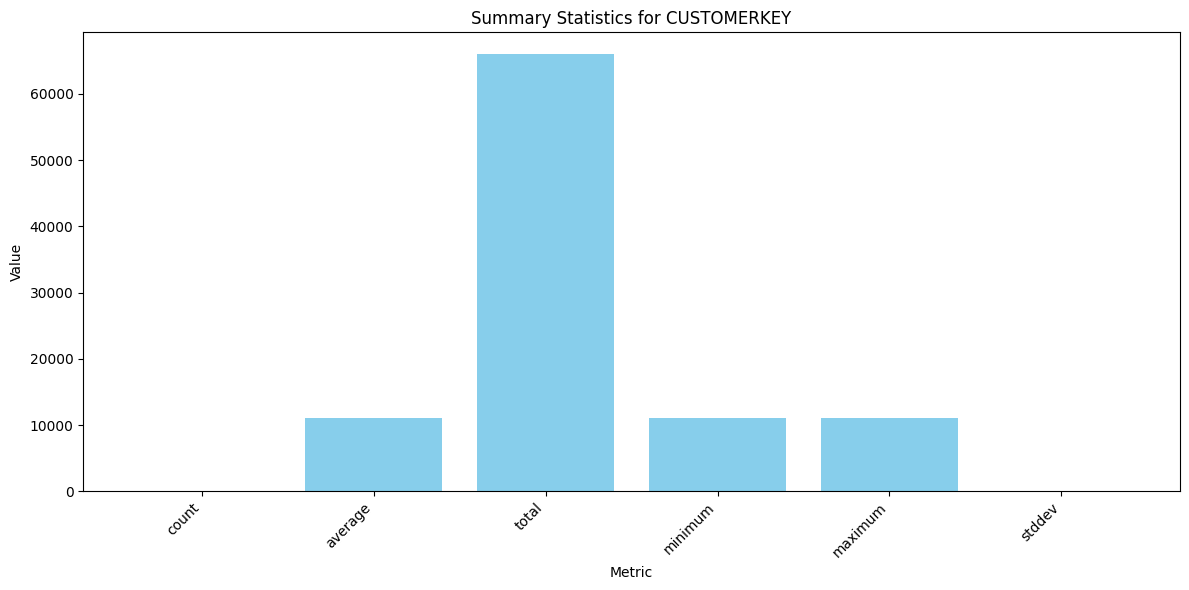


Summary Statistics for GEOGRAPHYKEY:
count        6.000000
average     31.333333
total      188.000000
minimum     26.000000
maximum     37.000000
stddev       4.496913
Name: 0, dtype: float64


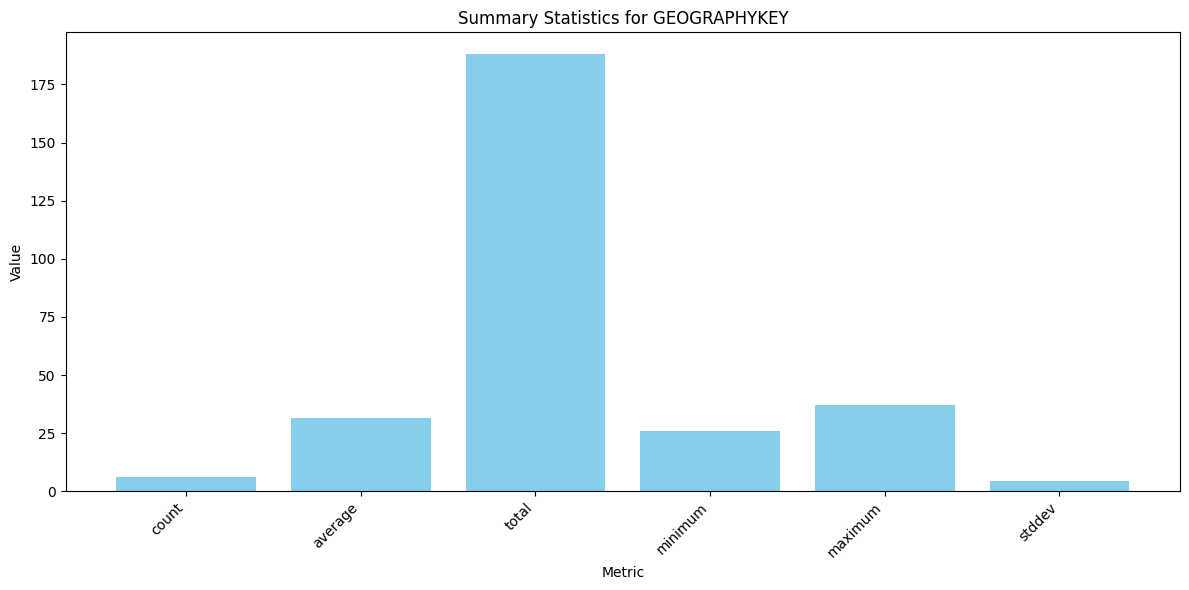


Summary Statistics for NAMESTYLE:
count      6.0
average    0.0
total      0.0
minimum    0.0
maximum    0.0
stddev     0.0
Name: 0, dtype: float64


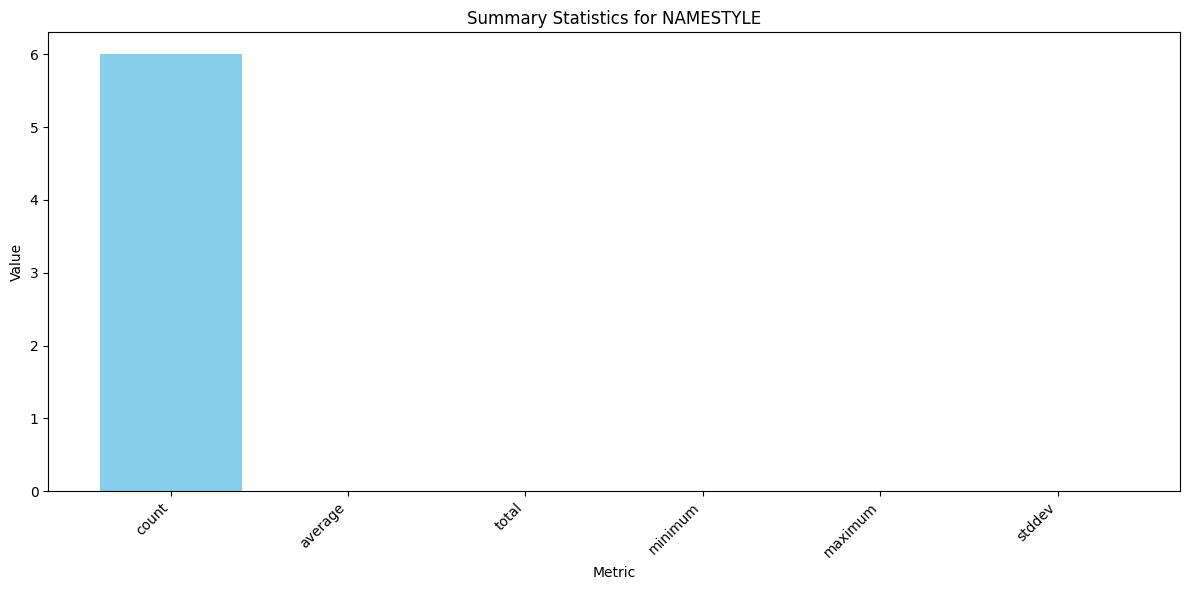


Summary Statistics for YEARLYINCOME:
count           6.000000
average     70000.000000
total      420000.000000
minimum     60000.000000
maximum     90000.000000
stddev      14142.135624
Name: 0, dtype: float64


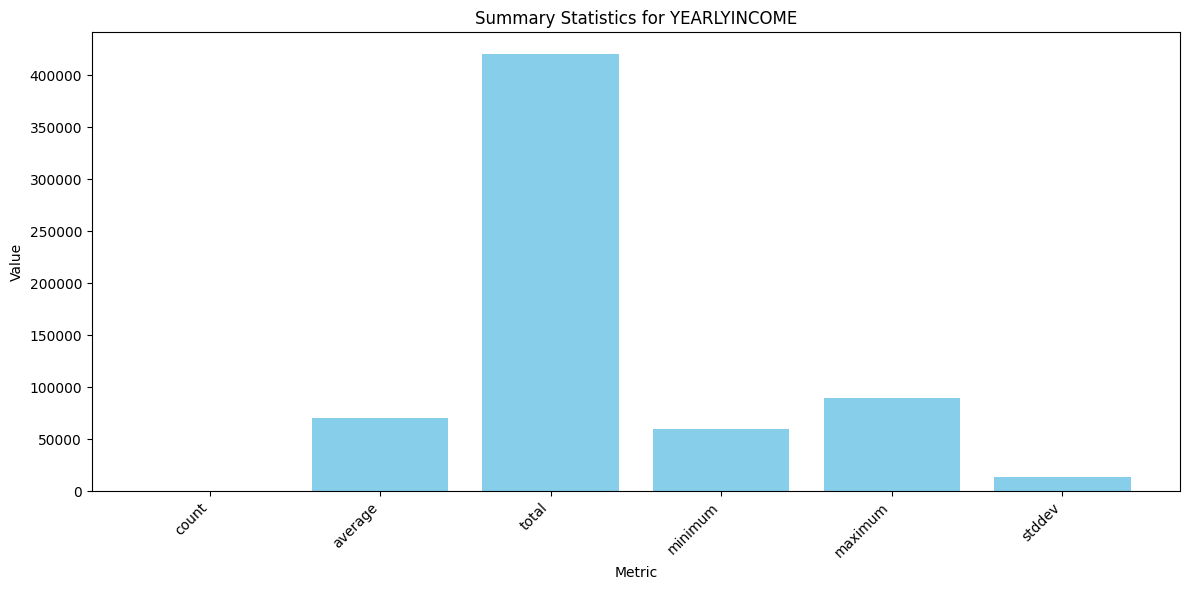


Summary Statistics for TOTALCHILDREN:
count       6.000000
average     2.666667
total      16.000000
minimum     2.000000
maximum     3.000000
stddev      0.471405
Name: 0, dtype: float64


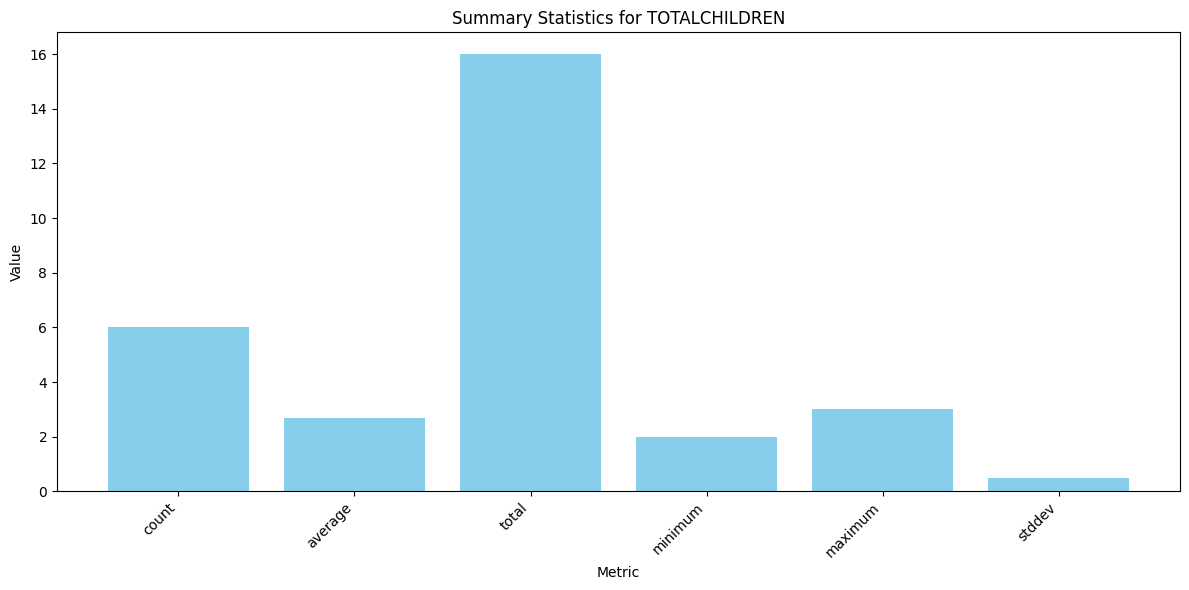


Summary Statistics for NUMBERCHILDRENATHOME:
count       6.000000
average     2.000000
total      12.000000
minimum     0.000000
maximum     3.000000
stddev      1.414214
Name: 0, dtype: float64


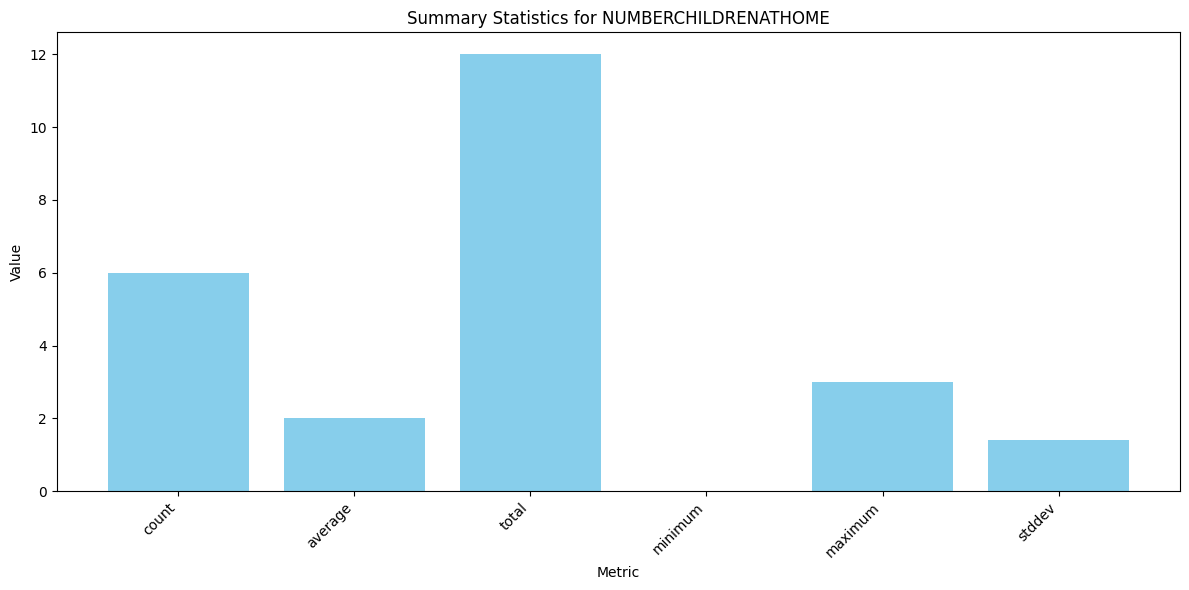


Summary Statistics for HOUSEOWNERFLAG:
count      6.000000
average    0.666667
total      4.000000
minimum    0.000000
maximum    1.000000
stddev     0.471405
Name: 0, dtype: float64


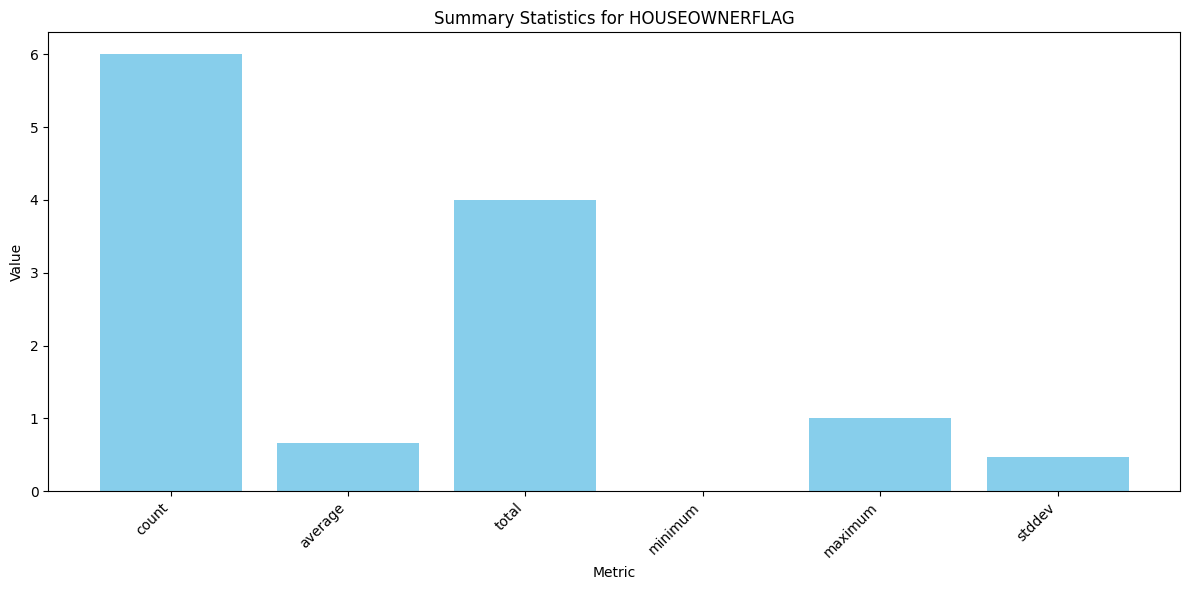


Summary Statistics for NUMBERCARSOWNED:
count      6.000000
average    0.666667
total      4.000000
minimum    0.000000
maximum    1.000000
stddev     0.471405
Name: 0, dtype: float64


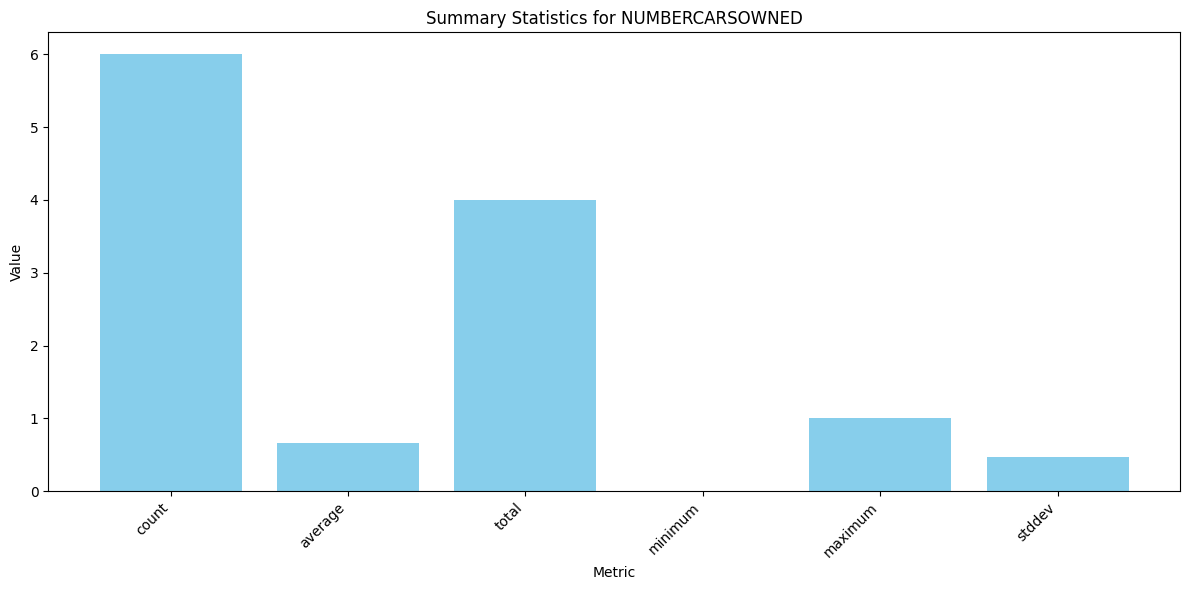

In [9]:
# --- Analyze Numeric Columns ---
numeric_columns = [col_name for col_name, data_type in df.dtypes if data_type in ['int', 'double', 'float', 'bigint', 'smallint', 'tinyint']]

for col_name in numeric_columns:
    print(f"\nSummary Statistics for {col_name}:")
    summary_df = df.select(count("*").alias("count"),
                           avg(col_name).alias("average"),
                           sum(col_name).alias("total"),
                           min(col_name).alias("minimum"),
                           max(col_name).alias("maximum"),
                           stddev_pop(col_name).alias("stddev")).toPandas().iloc[0]
    print(summary_df)
    
    # --- Visualization for Numeric Columns (Bar Chart) ---
    labels = summary_df.index
    values = summary_df.values
    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.title(f'Summary Statistics for {col_name}')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


--- Average Quantity by ENGLISHEDUCATION (Top 10) ---
  ENGLISHEDUCATION  AVGYEARLYINCOME
0        Bachelors          70000.0


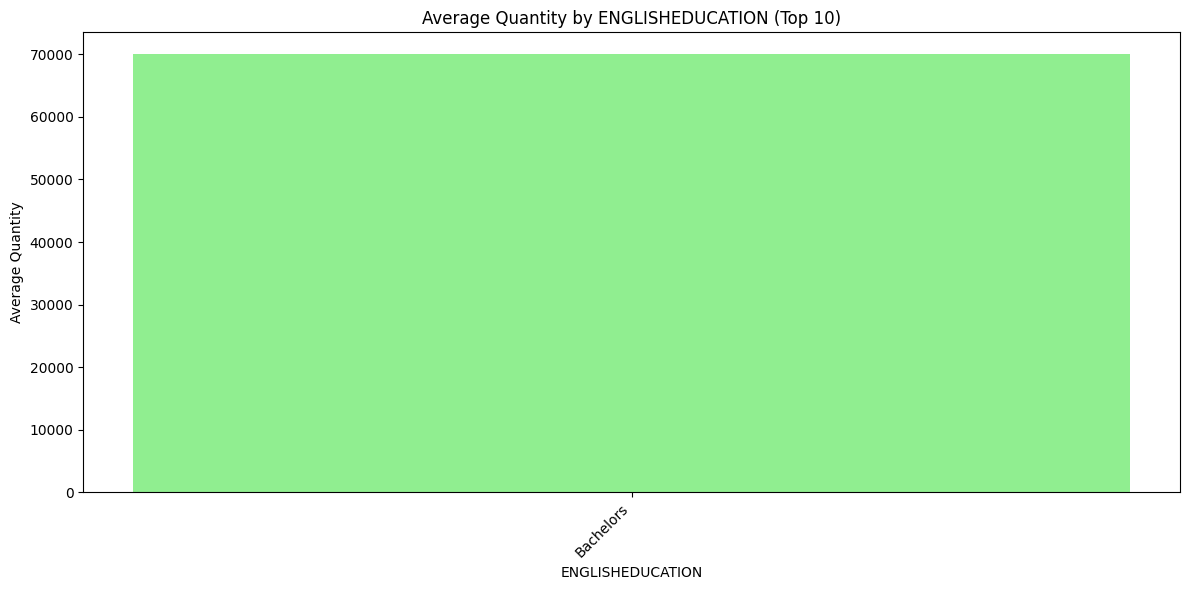


--- Average Quantity by GENDER (Top 10) ---
  GENDER  AVGYEARLYINCOME
0      M          70000.0


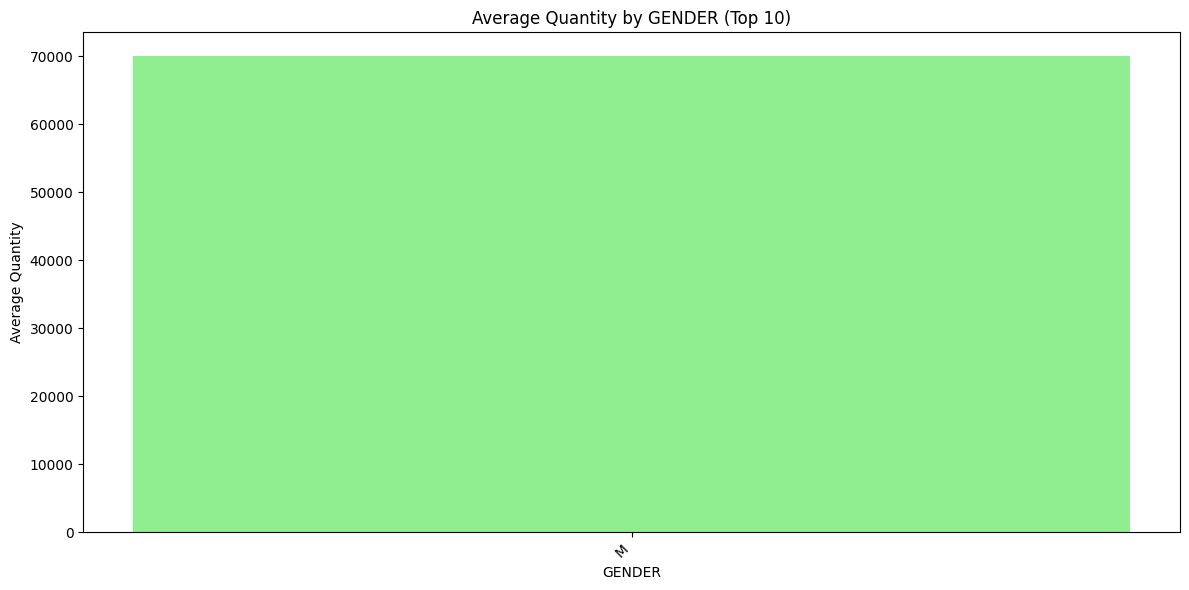


--- Average Quantity by MARITALSTATUS (Top 10) ---
  MARITALSTATUS  AVGYEARLYINCOME
0             S          60000.0
1             M          75000.0


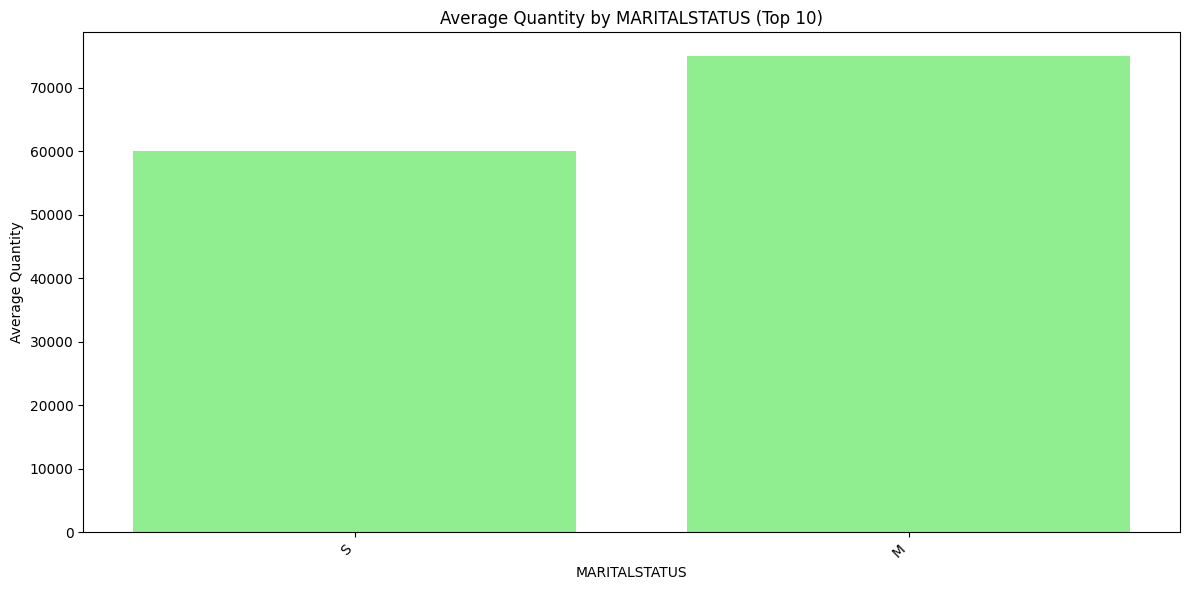


--- Average Quantity by ENGLISHOCCUPATION (Top 10) ---
  ENGLISHOCCUPATION  AVGYEARLYINCOME
0      Professional          70000.0


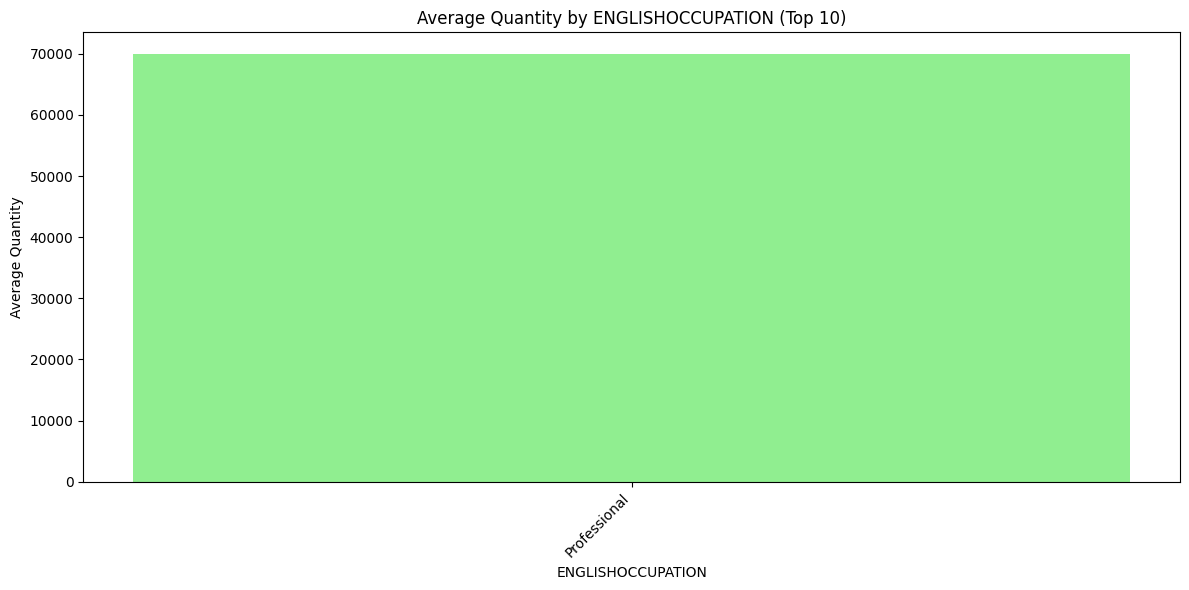


--- Average Quantity by COMMUTEDISTANCE (Top 10) ---
  COMMUTEDISTANCE  AVGYEARLYINCOME
0       2-5 Miles          60000.0
1       1-2 Miles          90000.0
2       0-1 Miles          60000.0


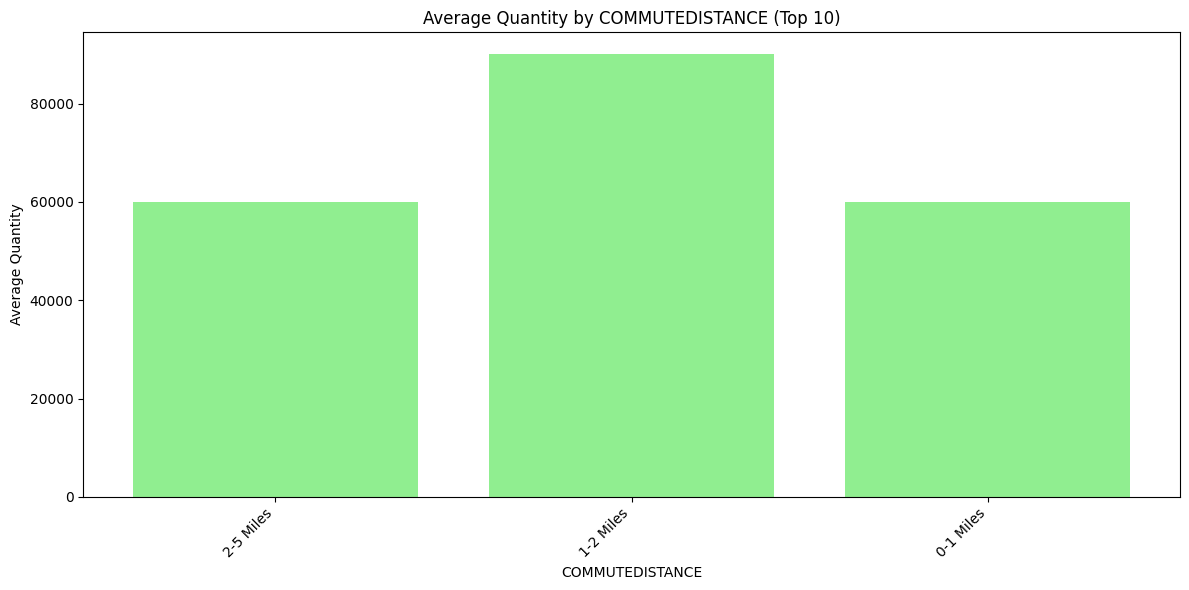

In [10]:
# --- Analyze by Key Columns (Example: ProductKey and LocationID) ---
key_columns = ["ENGLISHEDUCATION","GENDER","MARITALSTATUS","ENGLISHOCCUPATION","COMMUTEDISTANCE"]

for key_col in key_columns:
    print(f"\n--- Average Quantity by {key_col} (Top 10) ---")
    avg_qty_by_key = df.groupBy(key_col) \
        .agg(avg("YEARLYINCOME").alias("AVGYEARLYINCOME")) \
        .orderBy(key_col, ascending=False) \
        .limit(10)
    avg_qty_by_key_pd = avg_qty_by_key.toPandas()
    print(avg_qty_by_key_pd)
    
    # --- Visualization for Average Quantity by Key (Bar Chart) ---
    plt.figure(figsize=(12, 6))
    plt.bar(avg_qty_by_key_pd[key_col].astype(str), avg_qty_by_key_pd["AVGYEARLYINCOME"], color='lightgreen')
    plt.title(f'Average Quantity by {key_col} (Top 10)')
    plt.xlabel(key_col)
    plt.ylabel('Average Quantity')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

And that's a wrap.